This notebook contains the code for visualizing the labeling features distributions within the clusters for finding clusters' statistical difference.

In [1]:
import sys
import warnings
import pandas as pd
sys.path.append('../../')
from functions.visualizations import boxplot
from functions.labeling_set_preprocessing import convert_categorical
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_pickle('../../data/labeling_visualizations/kmeans_categories_final_labeling.pkl')

In [8]:
# convert all the categorical features to numerical
df = convert_categorical(df)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.087e-01 U_stat=2.050e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.087e-01 U_stat=2.050e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.507e-01 U_stat=5.926e+04
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.

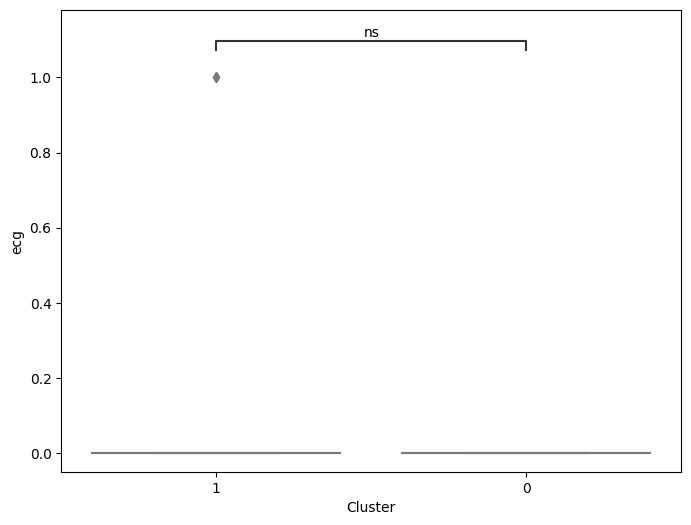

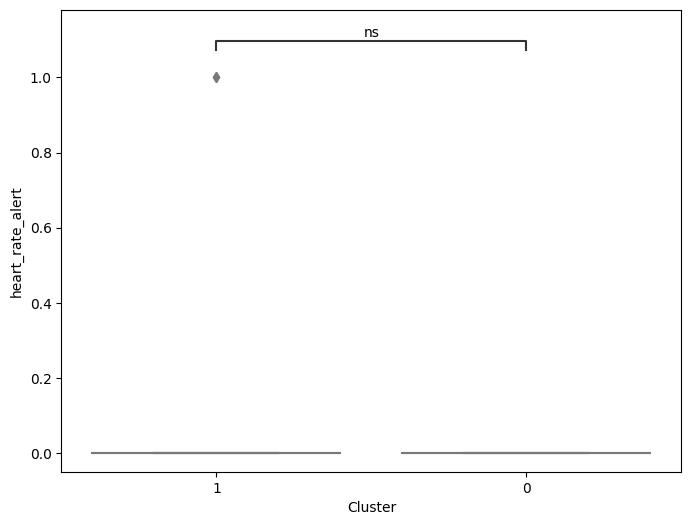

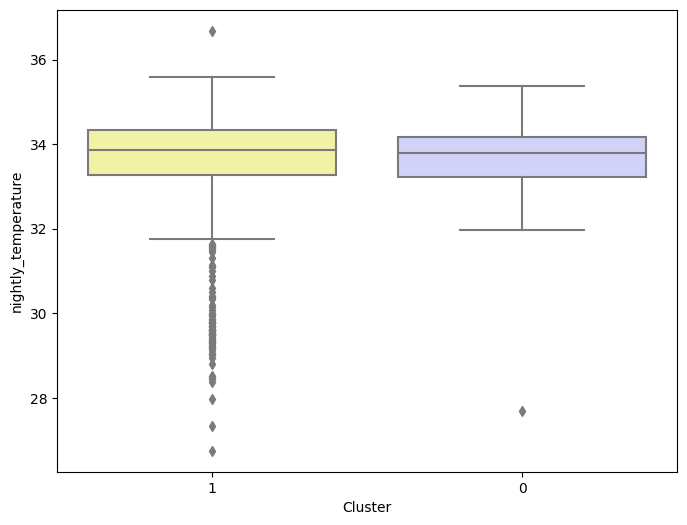

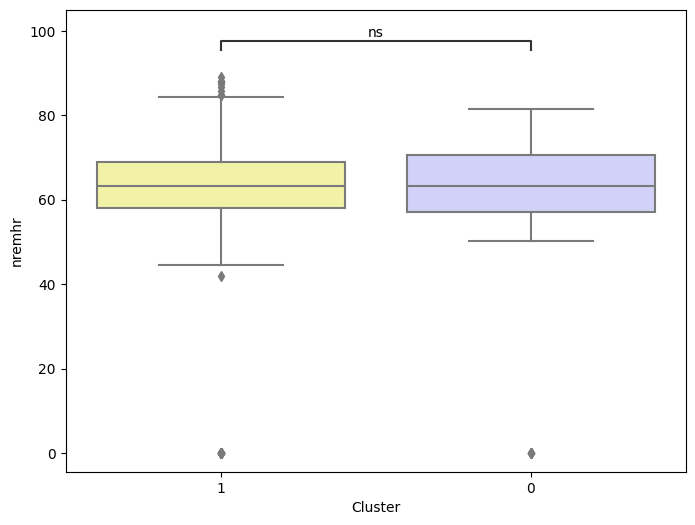

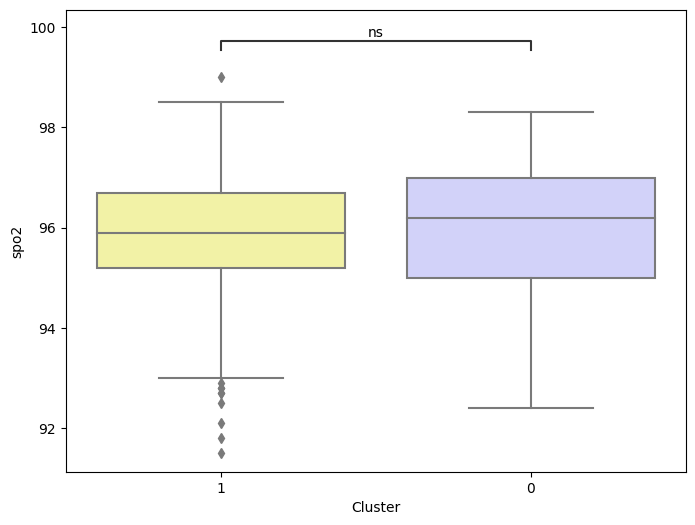

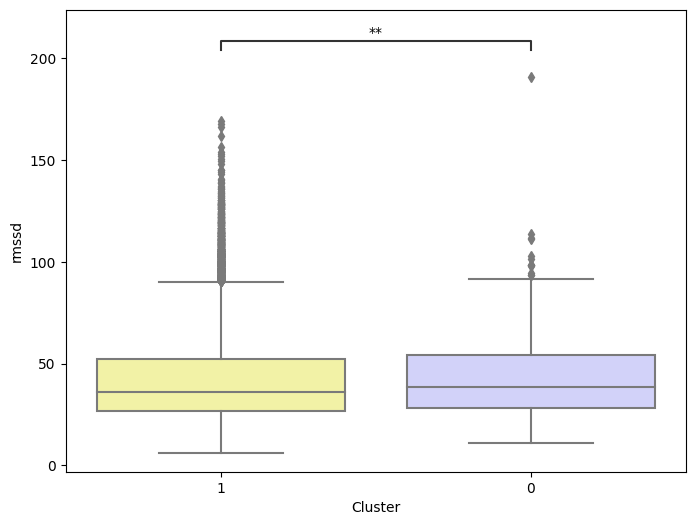

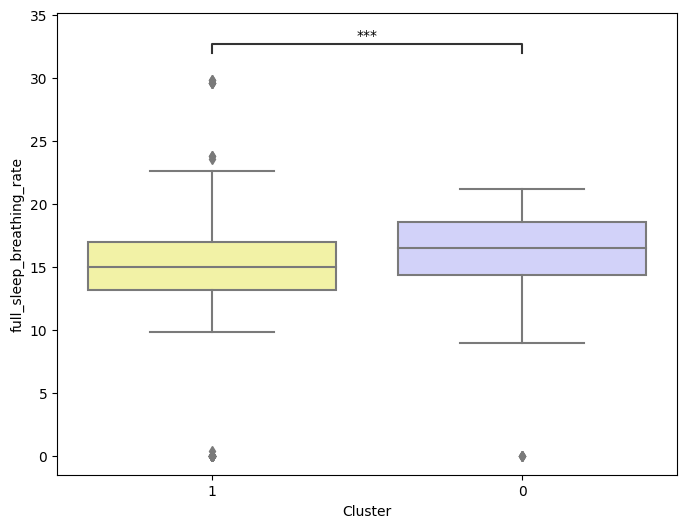

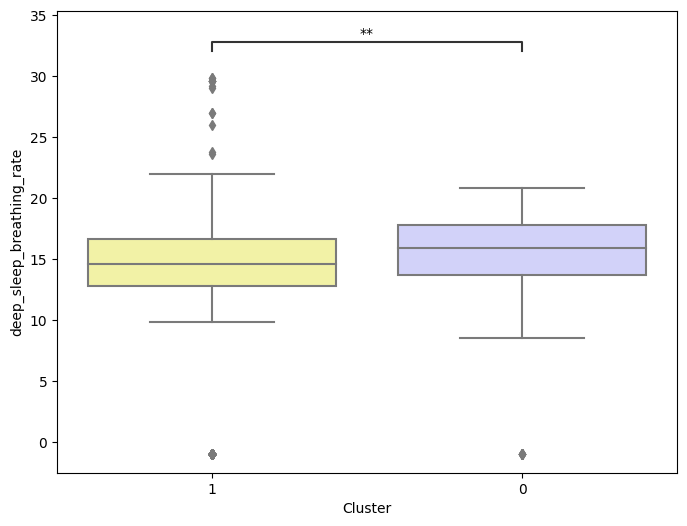

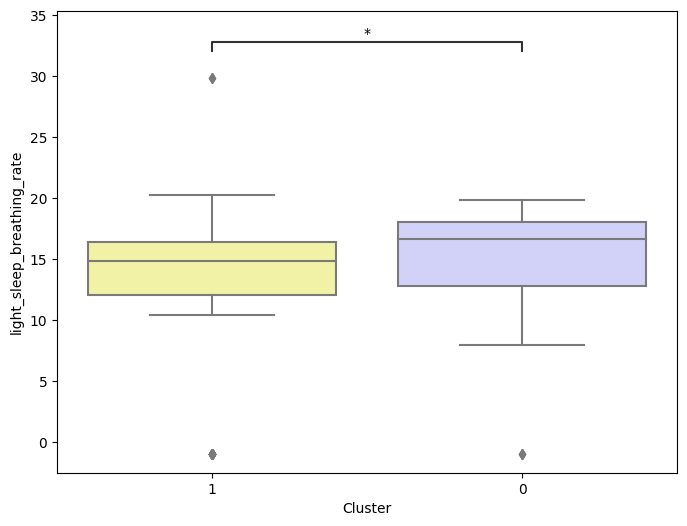

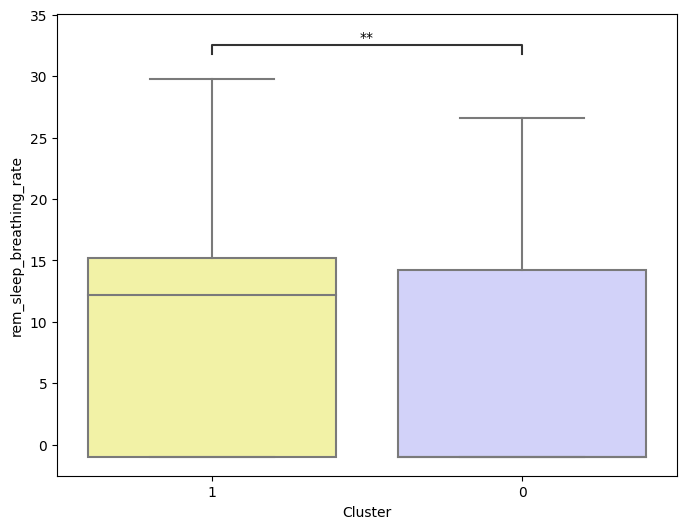

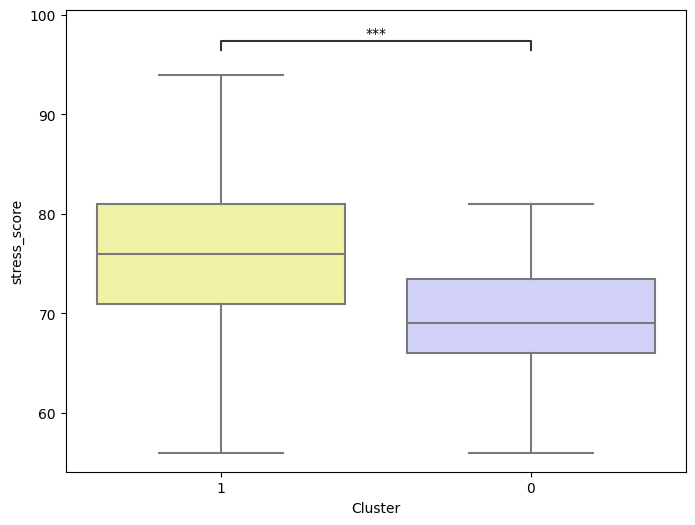

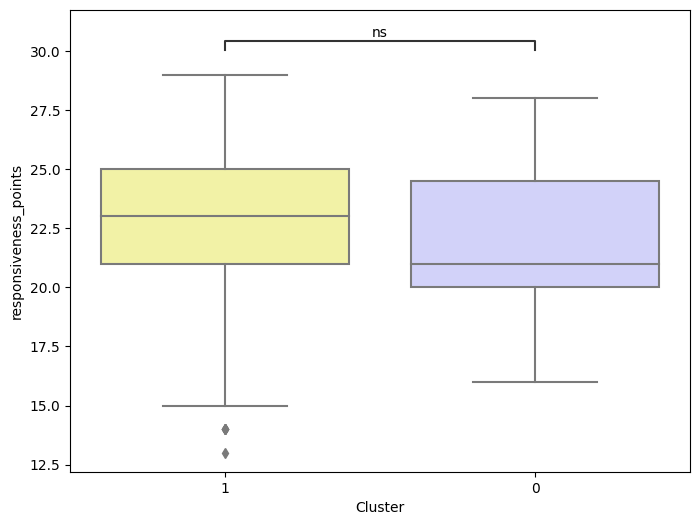

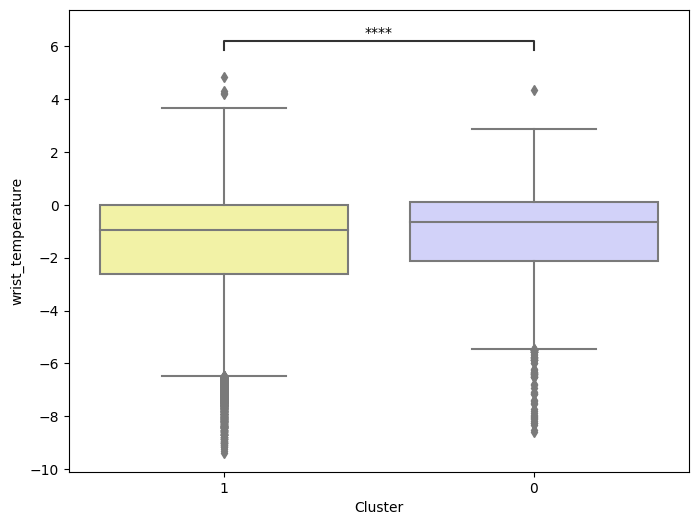

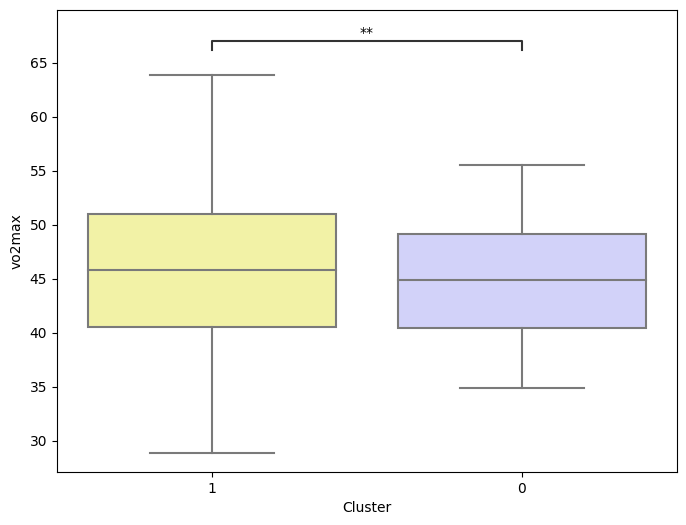

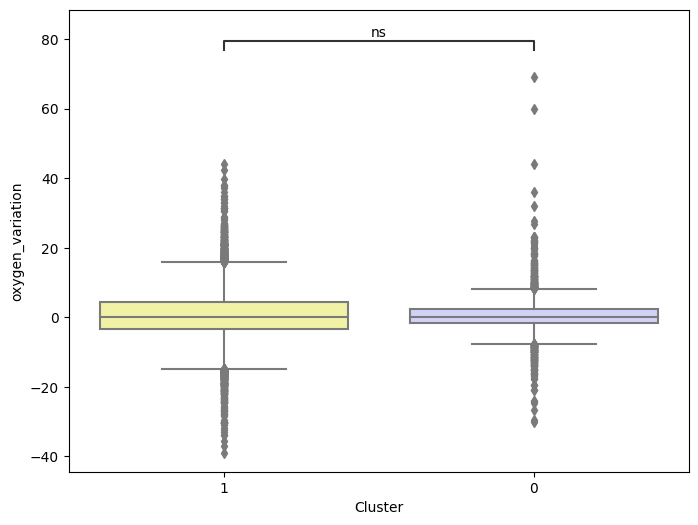

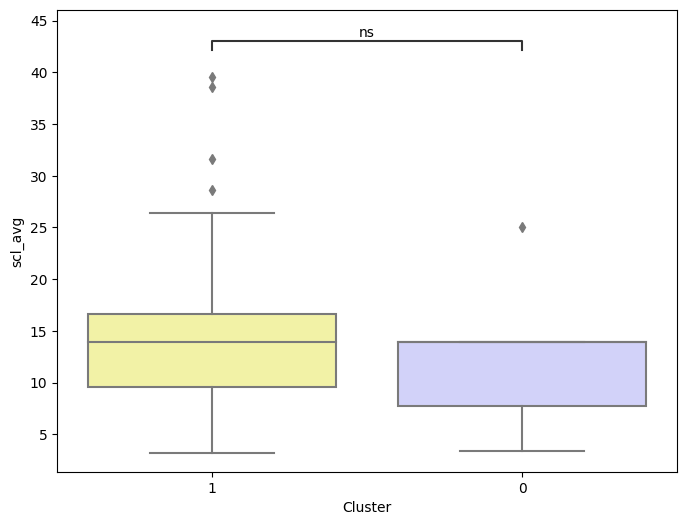

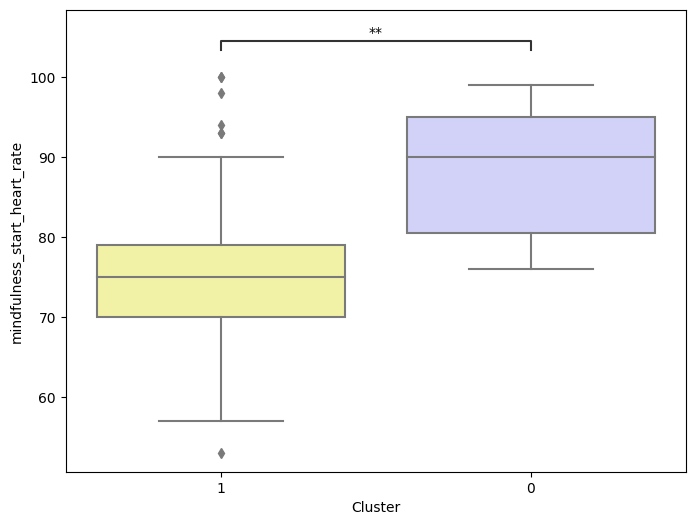

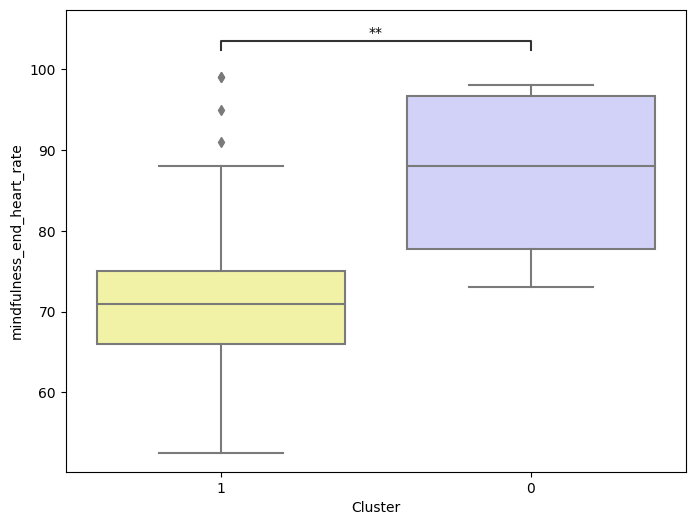

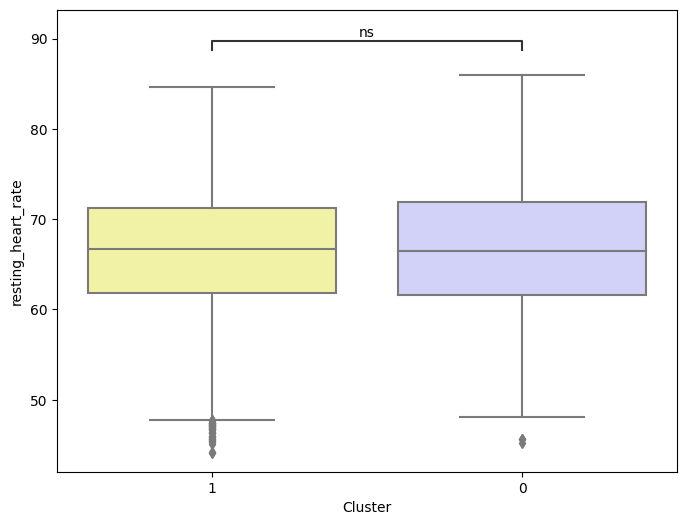

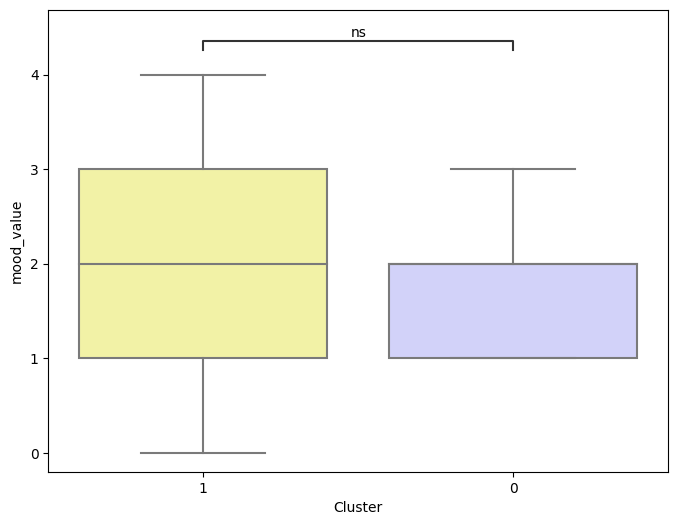

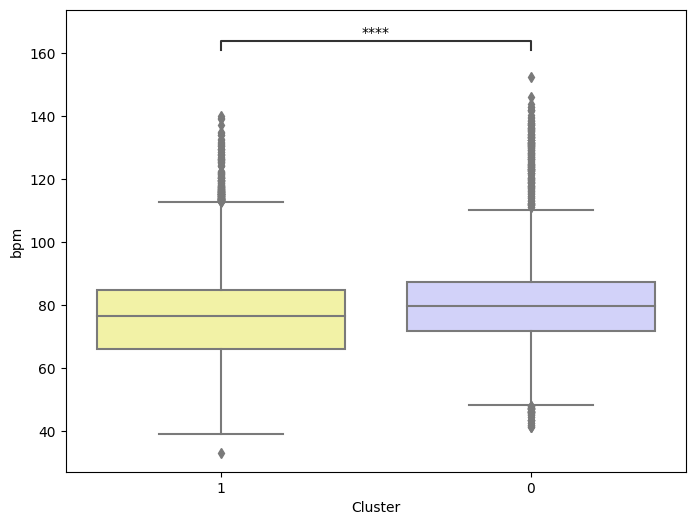

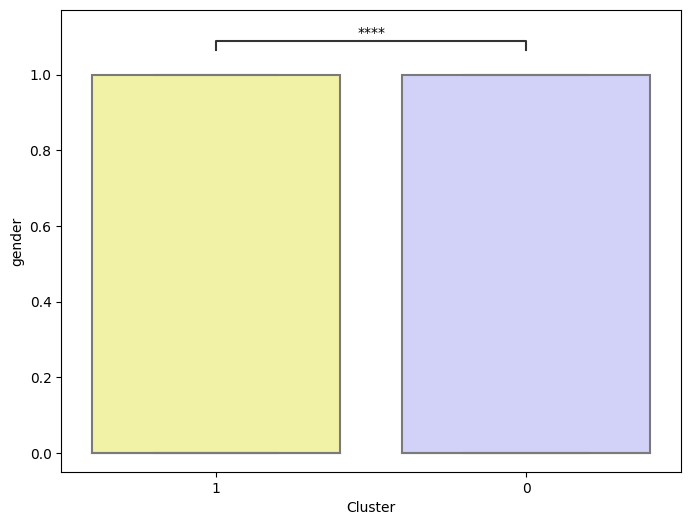

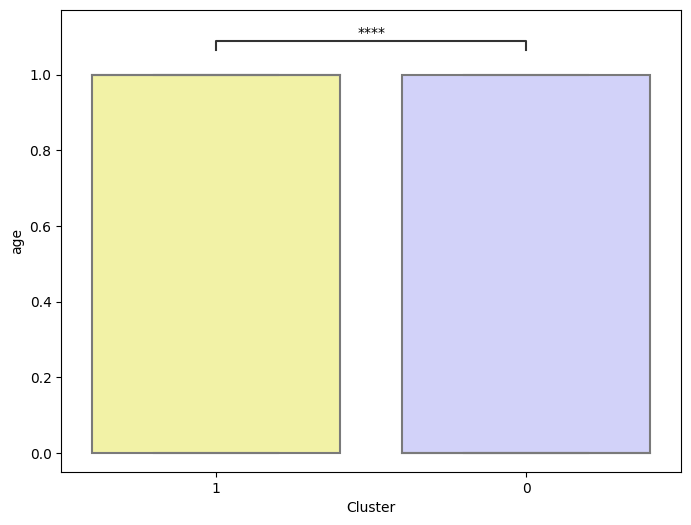

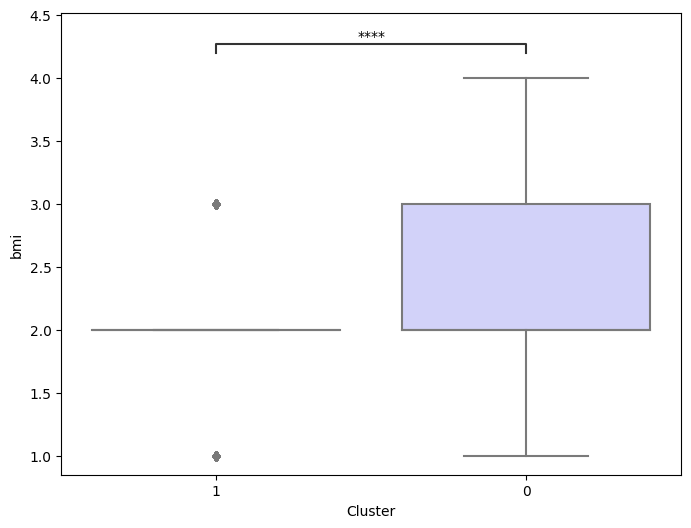

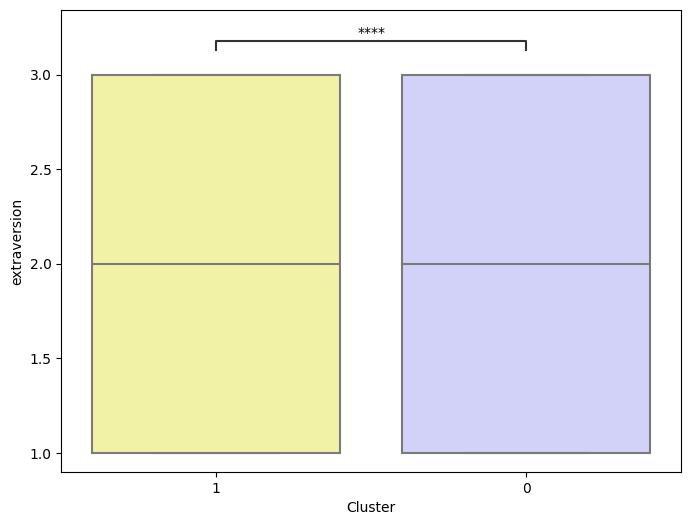

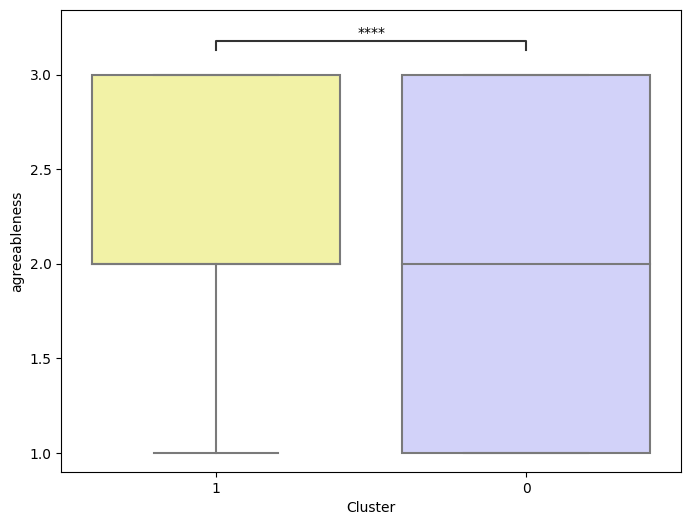

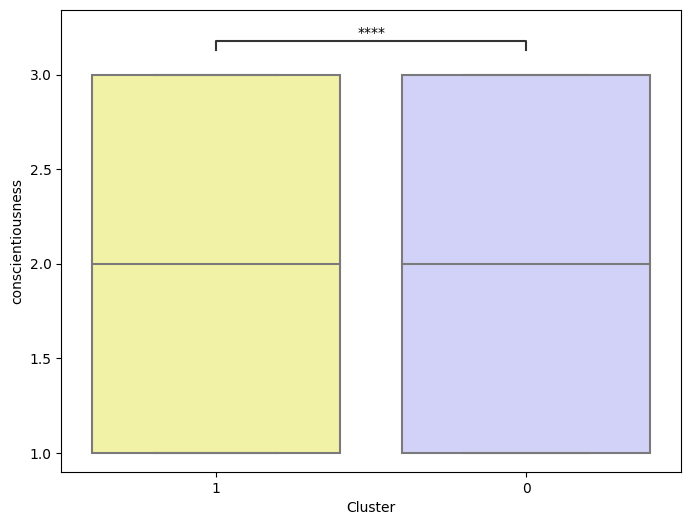

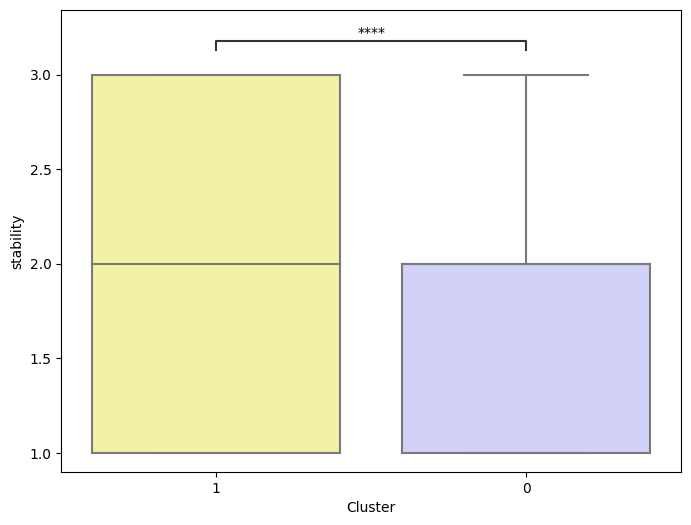

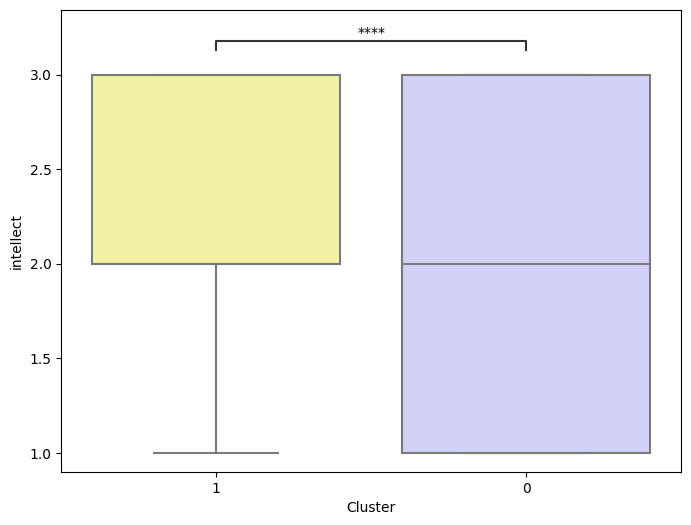

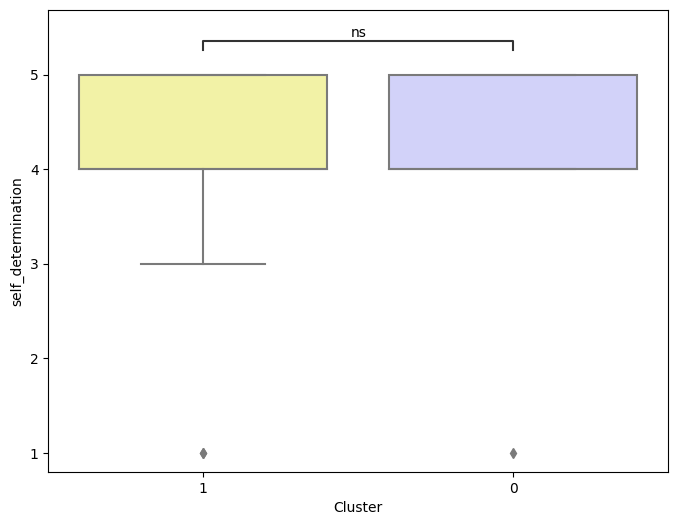

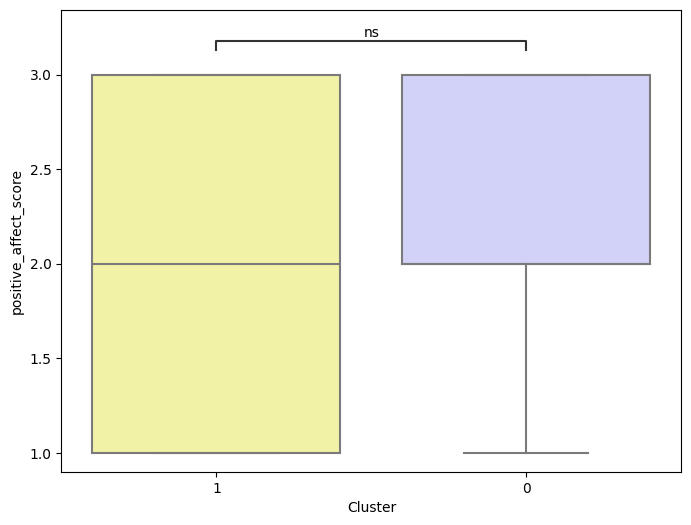

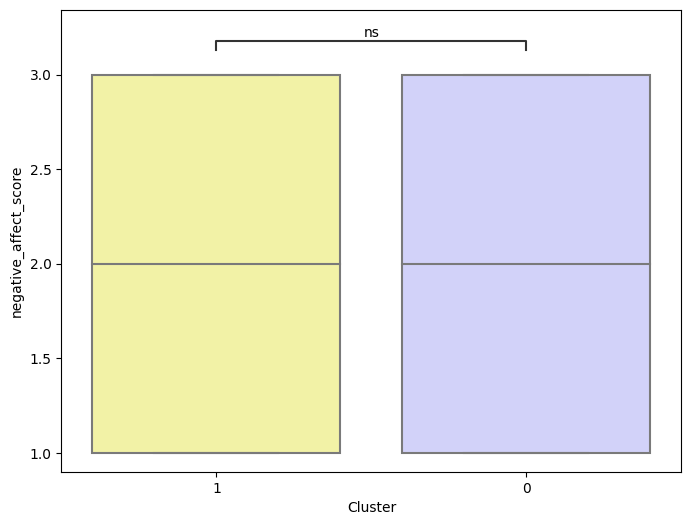

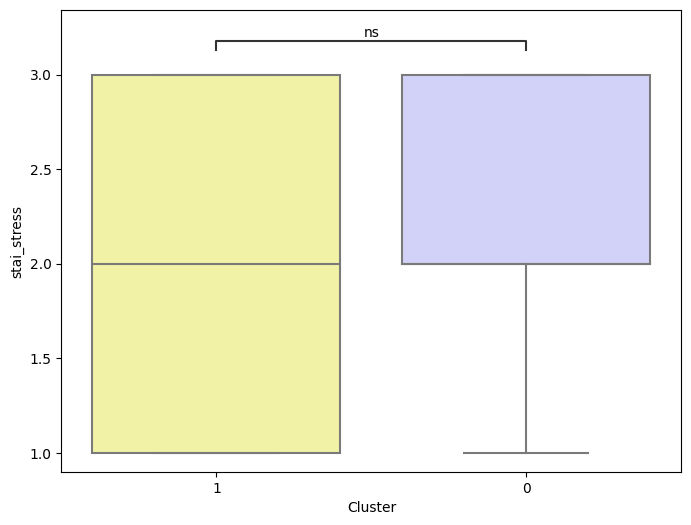

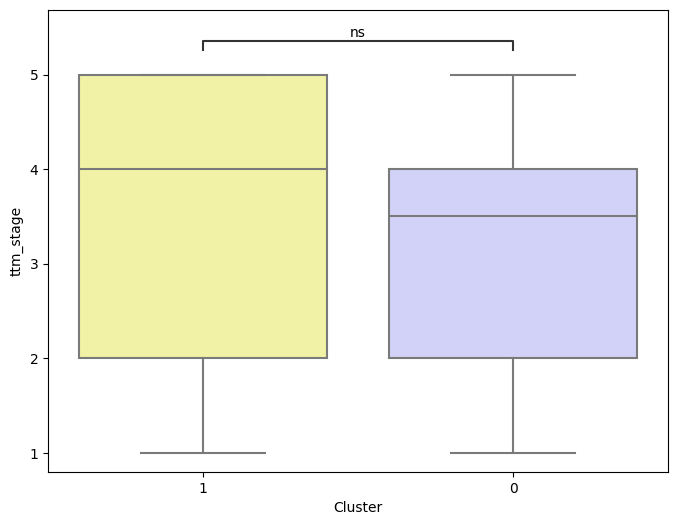

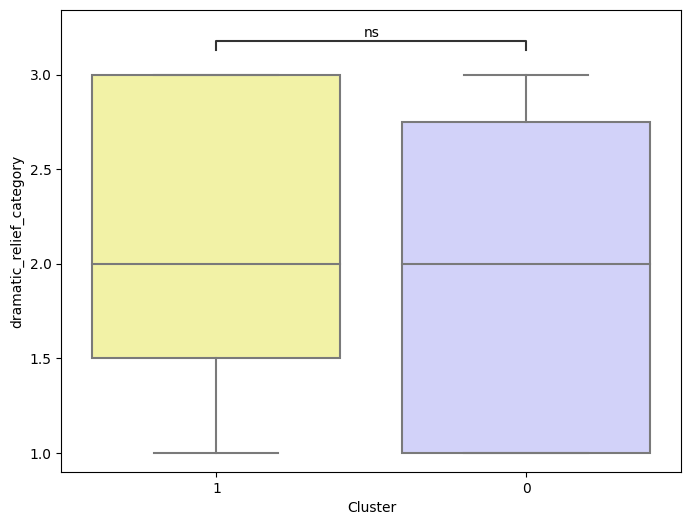

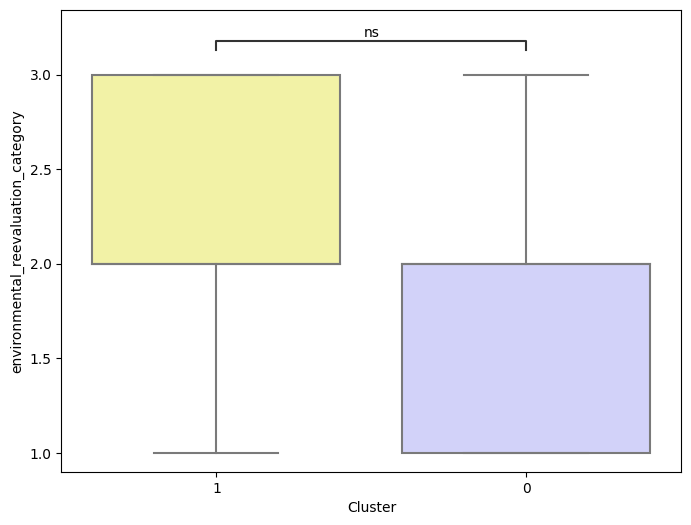

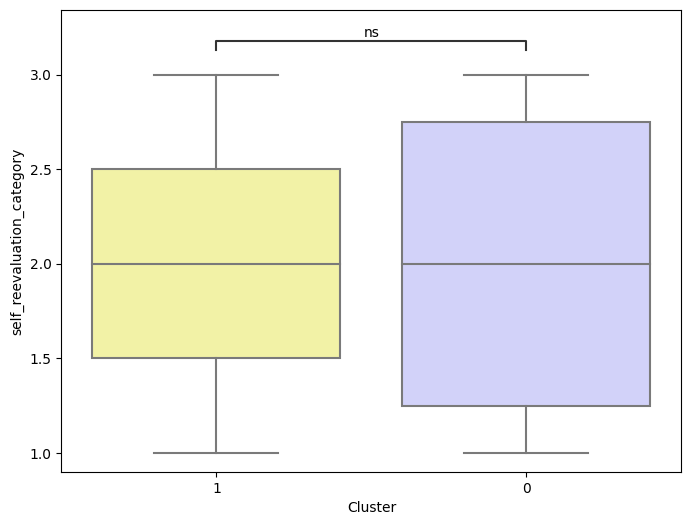

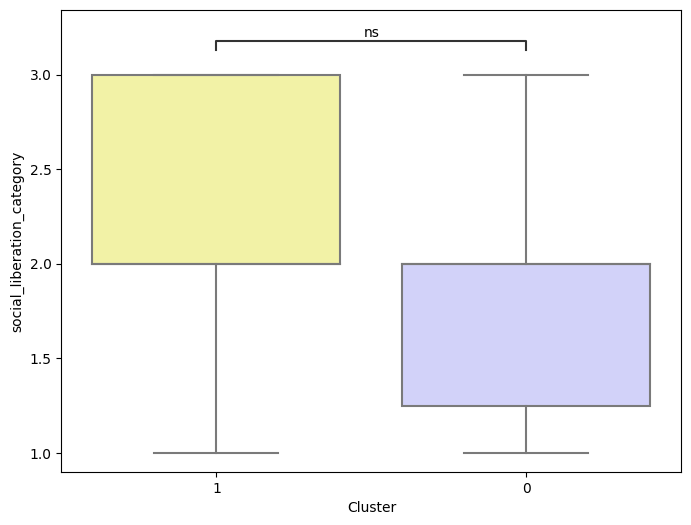

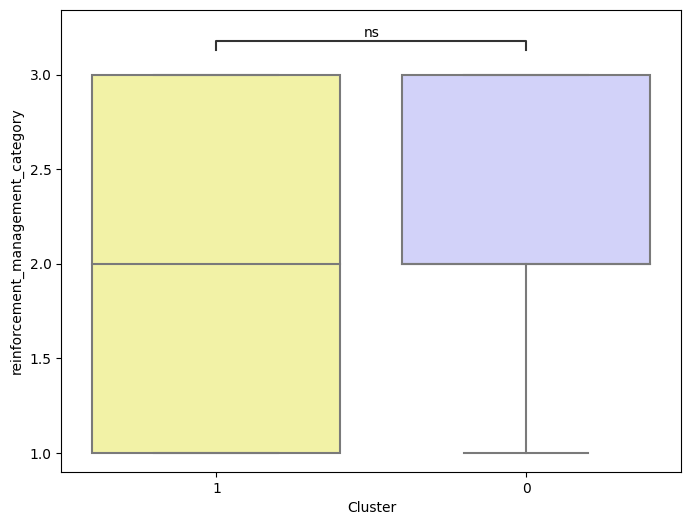

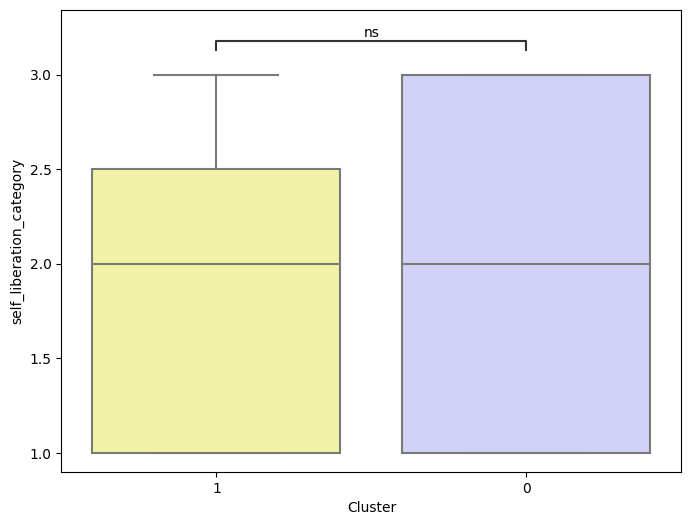

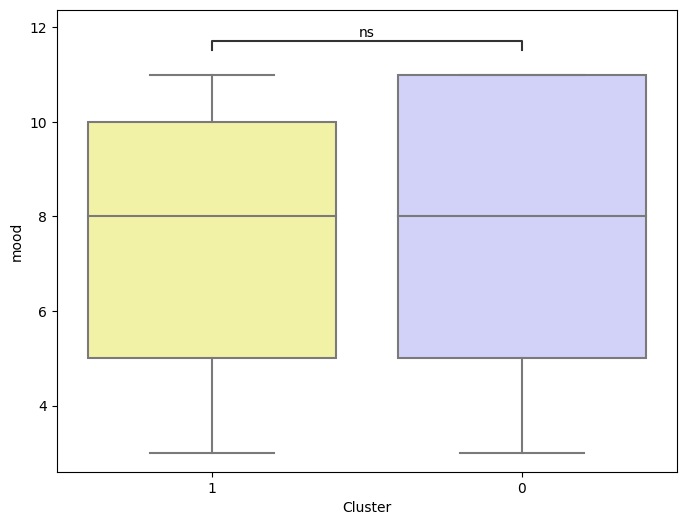

In [4]:
# visualize the distribution of the labeling features within the clustering results
for col in list(df.loc[:, 'ecg':'mood'].columns):
    # keep only the data that does not contain NaN values in this specific feature
    visualize_data = df.dropna(subset=[col])
    # for the features resting_heart_rate, stress_score and responsiveness_points keep only the rows that do not contain 0 values
    if col in ['resting_heart_rate', 'stress_score', 'responsiveness_points']:
        visualize_data = visualize_data[visualize_data[col] != 0]
    visualize_data['cluster'] = visualize_data['cluster'].astype(str)
    boxplot(visualize_data, col, 'clustering_labeling', 'kmeans_2', 'categories')